Taken from website:-
https://ourworldindata.org/coronavirus-source-data

Import libraries

In [26]:
import pandas as pd
import numpy as np

Read files

In [27]:
# load datasets
train = pd.read_csv('/content/drive/MyDrive/owid-covid-data.csv')
train

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55886,ZWE,Africa,Zimbabwe,2020-12-19,12151.0,104.0,133.143,318.0,2.0,1.571,817.537,6.997,8.958,21.396,0.135,0.106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1581.0,196747.0,13.237,0.106,1488.0,0.100,0.089,11.2,tests performed,NaN,NaN,69.44,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
55887,ZWE,Africa,Zimbabwe,2020-12-20,12325.0,174.0,154.143,320.0,2.0,1.857,829.244,11.707,10.371,21.530,0.135,0.125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2144.0,198891.0,13.382,0.144,1625.0,0.109,0.095,10.5,tests performed,NaN,NaN,69.44,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
55888,ZWE,Africa,Zimbabwe,2020-12-21,12422.0,97.0,152.000,322.0,2.0,1.857,835.771,6.526,10.227,21.665,0.135,0.125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205.0,200096.0,13.463,0.081,1565.0,0.105,0.097,10.3,tests performed,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
55889,ZWE,Africa,Zimbabwe,2020-12-22,12544.0,122.0,146.000,326.0,4.0,2.286,843.979,8.208,9.823,21.934,0.269,0.154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535


In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55891 entries, 0 to 55890
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   iso_code                            55570 non-null  object 
 1   continent                           55233 non-null  object 
 2   location                            55891 non-null  object 
 3   date                                55891 non-null  object 
 4   total_cases                         55334 non-null  float64
 5   new_cases                           55328 non-null  float64
 6   new_cases_smoothed                  54372 non-null  float64
 7   total_deaths                        47184 non-null  float64
 8   new_deaths                          47183 non-null  float64
 9   new_deaths_smoothed                 54372 non-null  float64
 10  total_cases_per_million             55013 non-null  float64
 11  new_cases_per_million               55007

In [29]:
country = "United Kingdom"

include_uk = train[train['location'].values == country]
exclude_uk = train[train['location'].values != country]
include_uk

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
52543,GBR,Europe,United Kingdom,2020-01-31,2.0,2.0,NaN,NaN,NaN,NaN,0.029,0.029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
52544,GBR,Europe,United Kingdom,2020-02-01,2.0,0.0,NaN,NaN,NaN,NaN,0.029,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
52545,GBR,Europe,United Kingdom,2020-02-02,2.0,0.0,NaN,NaN,NaN,NaN,0.029,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
52546,GBR,Europe,United Kingdom,2020-02-03,8.0,6.0,NaN,NaN,NaN,NaN,0.118,0.088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
52547,GBR,Europe,United Kingdom,2020-02-04,8.0,0.0,NaN,NaN,NaN,NaN,0.118,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52866,GBR,Europe,United Kingdom,2020-12-19,2010077.0,27249.0,24875.429,67177.0,537.0,436.286,29609.594,401.393,366.429,989.556,7.910,6.427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,440584.0,47603238.0,701.223,6.490,356456.0,5.251,0.070,14.3,tests performed,350000.0,0.52,78.70,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
52867,GBR,Europe,United Kingdom,2020-12-20,2046161.0,36084.0,27381.571,67503.0,326.0,462.286,30141.132,531.538,403.346,994.358,4.802,6.810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10064.676,148.258,433470.0,48036807.0,707.610,6.385,373781.0,5.506,0.073,13.7,tests performed,NaN,NaN,78.70,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
52868,GBR,Europe,United Kingdom,2020-12-21,2079678.0,33517.0,29258.714,67718.0,215.0,459.714,30634.857,493.725,430.998,997.525,3.167,6.772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,423675.0,48469931.0,713.990,6.241,396256.0,5.837,0.074,13.5,tests performed,500000.0,0.74,78.70,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
52869,GBR,Europe,United Kingdom,2020-12-22,2116609.0,36931.0,31881.857,68409.0,691.0,486.143,31178.872,544.015,469.638,1007.704,10.179,7.161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922


In [30]:
uk_newcase = pd.DataFrame({'date':include_uk.date , 'new_cases': include_uk.new_cases})
uk_newcase

,date,new_cases
52543,2020-01-31,2.0
52544,2020-02-01,0.0
52545,2020-02-02,0.0
52546,2020-02-03,6.0
52547,2020-02-04,0.0
...,...,...
52866,2020-12-19,27249.0
52867,2020-12-20,36084.0
52868,2020-12-21,33517.0
52869,2020-12-22,36931.0


Rename columns

In [31]:
uk_newcase.rename(columns={'date':'ds', 'new_cases': 'y'}, inplace=True)
uk_newcase

,ds,y
52543,2020-01-31,2.0
52544,2020-02-01,0.0
52545,2020-02-02,0.0
52546,2020-02-03,6.0
52547,2020-02-04,0.0
...,...,...
52866,2020-12-19,27249.0
52867,2020-12-20,36084.0
52868,2020-12-21,33517.0
52869,2020-12-22,36931.0


Graph time series

Text(0, 0.5, 'y')

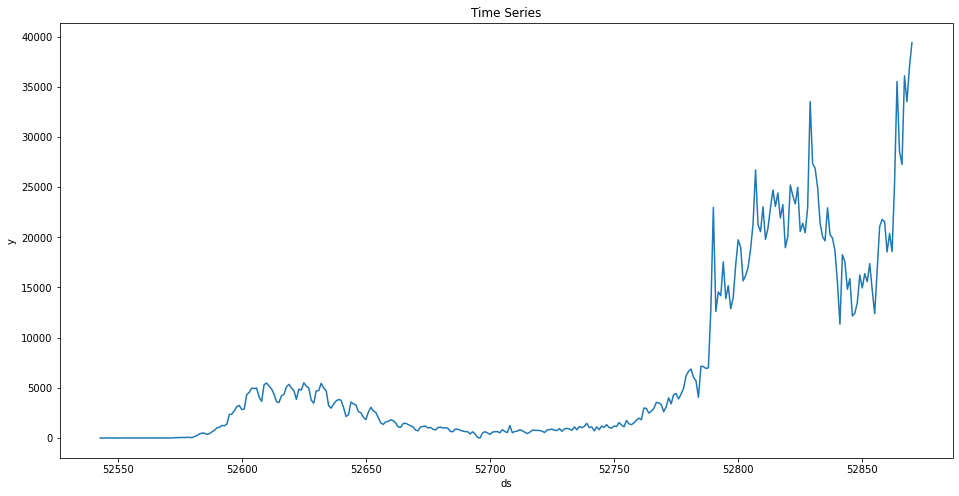

In [32]:
import matplotlib.pyplot as plt

uk_newcase['y'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("ds") 
plt.ylabel("y")

Split time series

In [33]:
month = '2021-01'

test = pd.DataFrame({
    'date': pd.date_range(
        start = pd.Timestamp(month),                        
        end = pd.Timestamp(month) + pd.offsets.MonthEnd(0),
        freq = 'D'
    )
})
test

,date
0,2021-01-01
1,2021-01-02
2,2021-01-03
3,2021-01-04
4,2021-01-05
5,2021-01-06
6,2021-01-07
7,2021-01-08
8,2021-01-09
9,2021-01-10


In [34]:
test.rename(columns={'date':'ds'}, inplace=True)
test

,ds
0,2021-01-01
1,2021-01-02
2,2021-01-03
3,2021-01-04
4,2021-01-05
5,2021-01-06
6,2021-01-07
7,2021-01-08
8,2021-01-09
9,2021-01-10


In [35]:
X_train = uk_newcase.loc[uk_newcase["ds"]<"2020-12-01"]
X_val  = uk_newcase.loc[uk_newcase["ds"]>="2020-12-01"]
X_test = test.loc[test["ds"]>="2021-01-01"]

FB Prophet

In [36]:
from fbprophet import Prophet

model = Prophet()
model.fit(X_train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Predict on validation set

In [37]:
forecast = model.predict(X_val.drop(columns="y"))
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-12-01,25067.074041,21353.543405,28796.487769,25067.074041,25067.074041,-108.603877,-108.603877,-108.603877,-108.603877,-108.603877,-108.603877,0.0,0.0,0.0,24958.470164
1,2020-12-02,25305.204262,21813.762516,29593.517595,25305.204262,25305.204262,454.555019,454.555019,454.555019,454.555019,454.555019,454.555019,0.0,0.0,0.0,25759.759281
2,2020-12-03,25543.334482,22322.979465,29714.320067,25540.188697,25544.957896,544.407892,544.407892,544.407892,544.407892,544.407892,544.407892,0.0,0.0,0.0,26087.742374
3,2020-12-04,25781.464702,21996.092991,29733.943856,25771.517340,25789.726911,13.194344,13.194344,13.194344,13.194344,13.194344,13.194344,0.0,0.0,0.0,25794.659046
4,2020-12-05,26019.594923,22433.185967,29534.616579,25999.565160,26036.964106,-60.000906,-60.000906,-60.000906,-60.000906,-60.000906,-60.000906,0.0,0.0,0.0,25959.594017
5,2020-12-06,26257.725143,22208.783770,29889.502606,26227.424690,26281.760109,-287.613208,-287.613208,-287.613208,-287.613208,-287.613208,-287.613208,0.0,0.0,0.0,25970.111935
6,2020-12-07,26495.855363,22081.566069,29858.298416,26455.031185,26529.034864,-555.939264,-555.939264,-555.939264,-555.939264,-555.939264,-555.939264,0.0,0.0,0.0,25939.916099
7,2020-12-08,26733.985583,22864.921035,30267.747041,26680.126731,26777.145866,-108.603877,-108.603877,-108.603877,-108.603877,-108.603877,-108.603877,0.0,0.0,0.0,26625.381706
8,2020-12-09,26972.115804,23645.396011,31108.543500,26905.273000,27028.087552,454.555019,454.555019,454.555019,454.555019,454.555019,454.555019,0.0,0.0,0.0,27426.670823
9,2020-12-10,27210.246024,23866.083609,31565.372611,27129.400489,27277.583247,544.407892,544.407892,544.407892,544.407892,544.407892,544.407892,0.0,0.0,0.0,27754.653916


In [38]:
# Calculating the RMSE of the model
from math import sqrt
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(X_val['y'], forecast['yhat'])) 
print(rms)

8461.94647409187


In [39]:
forecast.yhat[forecast.yhat < 0] = 0

df_val=pd.DataFrame({'actual': X_val.y.values, 'predicted': forecast.yhat.values.astype(int)})
df_val.reset_index(drop=True, inplace=True)
df_val

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,actual,predicted
0,13497.0,24958
1,16237.0,25759
2,14951.0,26087
3,16382.0,25794
4,15579.0,25959
5,17372.0,25970
6,14774.0,25939
7,12386.0,26625
8,16634.0,27426
9,21066.0,27754


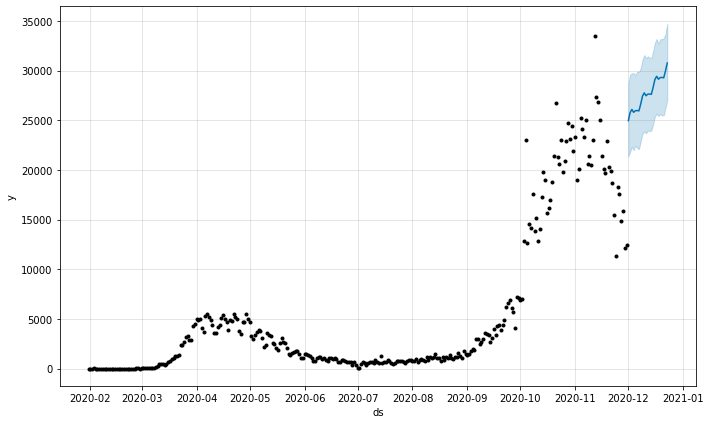

In [40]:
fig1 = model.plot(forecast)

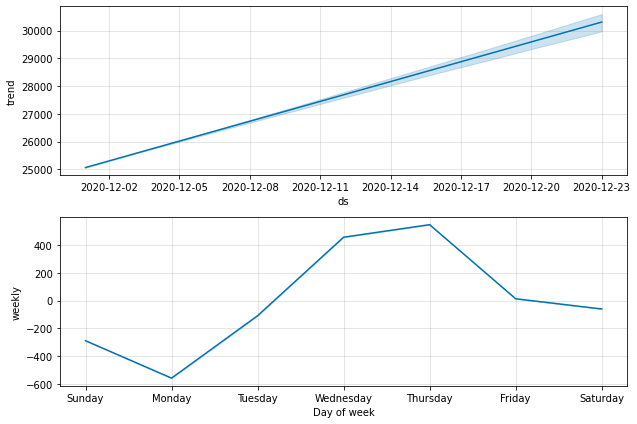

In [41]:
fig2 = model.plot_components(forecast)

In [42]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)

In [43]:
plot_components_plotly(model, forecast)

Predict on test set

In [44]:
prediction = model.predict(X_test)
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-01,32449.110870,28925.496426,36494.760575,31821.448495,33005.077285,13.194344,13.194344,13.194344,13.194344,13.194344,13.194344,0.0,0.0,0.0,32462.305214
1,2021-01-02,32687.241090,28664.351620,36327.468841,32034.039862,33267.799210,-60.000906,-60.000906,-60.000906,-60.000906,-60.000906,-60.000906,0.0,0.0,0.0,32627.240184
2,2021-01-03,32925.371311,28809.005080,36436.494619,32247.081786,33528.222570,-287.613208,-287.613208,-287.613208,-287.613208,-287.613208,-287.613208,0.0,0.0,0.0,32637.758102
3,2021-01-04,33163.501531,28616.057828,36436.227948,32457.498338,33786.699904,-555.939264,-555.939264,-555.939264,-555.939264,-555.939264,-555.939264,0.0,0.0,0.0,32607.562267
4,2021-01-05,33401.631751,29615.192074,37203.607853,32663.884460,34059.401275,-108.603877,-108.603877,-108.603877,-108.603877,-108.603877,-108.603877,0.0,0.0,0.0,33293.027874
5,2021-01-06,33639.761971,30213.650850,38313.265286,32860.586796,34328.436749,454.555019,454.555019,454.555019,454.555019,454.555019,454.555019,0.0,0.0,0.0,34094.316991
6,2021-01-07,33877.892192,30830.412929,38448.218221,33062.377506,34583.960392,544.407892,544.407892,544.407892,544.407892,544.407892,544.407892,0.0,0.0,0.0,34422.300084
7,2021-01-08,34116.022412,30525.575022,38072.706655,33274.706450,34855.285676,13.194344,13.194344,13.194344,13.194344,13.194344,13.194344,0.0,0.0,0.0,34129.216756
8,2021-01-09,34354.152632,30540.609675,38405.794692,33470.678581,35130.197747,-60.000906,-60.000906,-60.000906,-60.000906,-60.000906,-60.000906,0.0,0.0,0.0,34294.151726
9,2021-01-10,34592.282853,30624.215842,38113.057922,33680.044057,35396.538253,-287.613208,-287.613208,-287.613208,-287.613208,-287.613208,-287.613208,0.0,0.0,0.0,34304.669644


In [45]:
prediction.yhat[prediction.yhat < 0] = 0

output = pd.DataFrame({'date': test.ds, 'new_cases': prediction.yhat.values.astype(int)})
output.to_csv('new_cases.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [46]:
#upload submission
new_cases = pd.read_csv("new_cases.csv")
new_cases

,date,new_cases
0,2021-01-01,32462
1,2021-01-02,32627
2,2021-01-03,32637
3,2021-01-04,32607
4,2021-01-05,33293
5,2021-01-06,34094
6,2021-01-07,34422
7,2021-01-08,34129
8,2021-01-09,34294
9,2021-01-10,34304


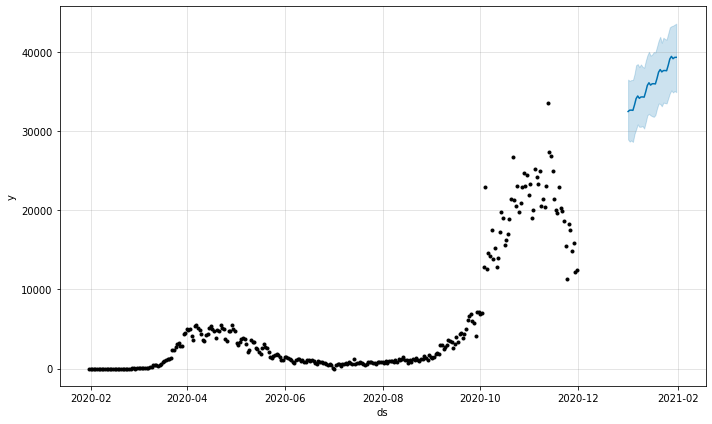

In [47]:
fig1 = model.plot(prediction)

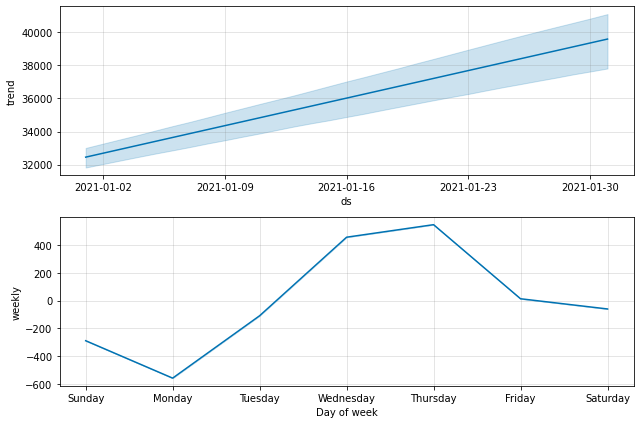

In [48]:
fig2 = model.plot_components(prediction)

In [49]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, prediction)

In [50]:
plot_components_plotly(model, prediction)